<a href="https://colab.research.google.com/github/yeb2Binfang/sklearn_learning/blob/main/PCA/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 调库

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

## 提取数据集

In [2]:
iris = load_iris()
y = iris.target
X = iris.data
#作为数组，X是几维？
X.shape
#作为数据表或特征矩阵，X是几维？
import pandas as pd
pd.DataFrame(X)


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 建模

In [3]:
#调用PCA
pca = PCA(n_components=2) #实例化
pca = pca.fit(X) #拟合模型
X_dr = pca.transform(X) #获取新矩阵
X_dr
#也可以fit_transform一步到位
#X_dr = PCA(2).fit_transform(X)


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

## 可视化

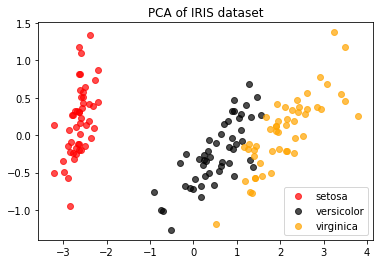

In [4]:
colors = ['red', 'black', 'orange']
iris.target_names
plt.figure()
for i in [0, 1, 2]:
    plt.scatter(X_dr[y == i, 0] # 这个是取数据，标签y==i的第0列的数据
               ,X_dr[y == i, 1] # 这个是取数据，标签y==i的第1列的数据
               ,alpha=.7
               ,c=colors[i]
               ,label=iris.target_names[i]
               )
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()


## 探索降维后的数据

In [6]:
#属性explained_variance_，查看降维后每个新特征向量上所带的信息量大小（可解释性方差的大小）第一个往往方差是最大的，因为要包含最多的信息，在这之后就会越来越小
pca.explained_variance_

array([4.22824171, 0.24267075])

In [7]:
#属性explained_variance_ratio，查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
#又叫做可解释方差贡献率
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [5]:
#大部分信息都被有效地集中在了第一个特征上
pca.explained_variance_ratio_.sum()

0.977685206318795

## 选择最好的n_components: 累积可解释方差贡献率曲线

当参数n_components中不填写任何值，则默认返回min(X.shape)个特征，一般来说，样本量都会大于特征数目，所以什么都不填就相当于转换了新特征空间，但没有减少特征的个数。一般来说，不会使用这种输入方式。但我们却可以使用这种输入方式来画出累计可解释方差贡献率曲线，以此选择最好的n_components的整数取值。累积可解释方差贡献率曲线是一条以降维后保留的特征个数为横坐标，降维后新特征矩阵捕捉到的可解释方差贡献率为纵坐标的曲线，能够帮助我们决定n_components最好的取值。

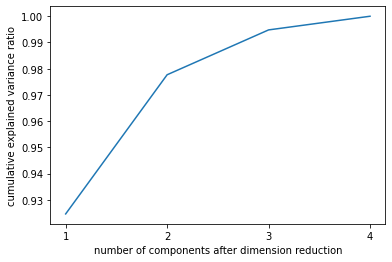

In [8]:
import numpy as np
pca_line = PCA().fit(X)
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4]) #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()


从上面这张图我们看到当我们选components 2 or 3时，我们包含的信息就已经接近99%了，所以我们可以选n_components = 2 or 3

## 最大似然估计自选超参数

除了输入整数，n_components还有哪些选择呢？之前我们提到过，矩阵分解的理论发展在业界独树一帜，勤奋智慧的数学大神Minka, T.P.在麻省理工学院媒体实验室做研究时找出了让PCA用最大似然估计(maximum likelihood estimation)自选超参数的方法，输入“mle”作为n_components的参数输入，就可以调用这种方法。

In [9]:
pca_mle = PCA(n_components="mle")
pca_mle = pca_mle.fit(X)
X_mle = pca_mle.transform(X)
X_mle
#可以发现，mle为我们自动选择了3个特征
pca_mle.explained_variance_ratio_.sum()
#得到了比设定2个特征时更高的信息含量，对于鸢尾花这个很小的数据集来说，3个特征对应这么高的信息含量，并不
#需要去纠结于只保留2个特征，毕竟三个特征也可以可视化


0.9947878161267247

In [10]:
print(X_mle)

[[-2.68412563  0.31939725 -0.02791483]
 [-2.71414169 -0.17700123 -0.21046427]
 [-2.88899057 -0.14494943  0.01790026]
 [-2.74534286 -0.31829898  0.03155937]
 [-2.72871654  0.32675451  0.09007924]
 [-2.28085963  0.74133045  0.16867766]
 [-2.82053775 -0.08946138  0.25789216]
 [-2.62614497  0.16338496 -0.02187932]
 [-2.88638273 -0.57831175  0.02075957]
 [-2.6727558  -0.11377425 -0.19763272]
 [-2.50694709  0.6450689  -0.07531801]
 [-2.61275523  0.01472994  0.10215026]
 [-2.78610927 -0.235112   -0.20684443]
 [-3.22380374 -0.51139459  0.06129967]
 [-2.64475039  1.17876464 -0.15162752]
 [-2.38603903  1.33806233  0.2777769 ]
 [-2.62352788  0.81067951  0.13818323]
 [-2.64829671  0.31184914  0.02666832]
 [-2.19982032  0.87283904 -0.12030552]
 [-2.5879864   0.51356031  0.21366517]
 [-2.31025622  0.39134594 -0.23944404]
 [-2.54370523  0.43299606  0.20845723]
 [-3.21593942  0.13346807  0.29239675]
 [-2.30273318  0.09870885  0.03912326]
 [-2.35575405 -0.03728186  0.12502108]
 [-2.50666891 -0.14601688

## 按信息量占比来选超参数

输入[0,1]之间的浮点数，并且让参数svd_solver =='full'，表示希望降维后的总解释性方差占比大于n_components 指定的百分比，即是说，希望保留百分之多少的信息量。比如说，如果我们希望保留97%的信息量，就可以输入 n_components = 0.97，PCA会自动选出能够让保留的信息量超过97%的特征数量。


In [11]:
pca_f = PCA(n_components=0.97,svd_solver="full")
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)
pca_f.explained_variance_ratio_


array([0.92461872, 0.05306648])